# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [46]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"] - 273.15
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["timezone"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iskateley
Processing Record 2 of Set 1 | tazovsky
Processing Record 3 of Set 1 | laguna
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | santa cruz
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | villa berthet
Processing Record 10 of Set 1 | tamanrasset
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | hammerfest
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | nuriootpa
Processing Record 16 of Set 1 | taroa
Processing Record 17 of Set 1 | sisimiut
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | mount pearl
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | thompson


In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

# Show Record Count
city_data_df.count()


City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iskateley,67.6803,53.1512,0.83,100,100,2.28,RU,10800
1,tazovsky,67.4667,78.7000,-11.14,81,45,4.23,RU,18000
2,laguna,38.4210,-121.4238,17.99,70,0,3.09,US,-25200
3,puerto natales,-51.7236,-72.4875,6.86,72,81,5.36,CL,-10800
4,puerto ayora,-0.7393,-90.3518,24.75,100,36,3.27,EC,-21600


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_main.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df2 = pd.read_csv("../output_data/cities_main.csv", index_col="City_ID")

# Display sample data
city_data_df2.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,0.83,100,100,2.28,RU,10800
1,tazovsky,67.4667,78.7000,-11.14,81,45,4.23,RU,18000
2,laguna,38.4210,-121.4238,17.99,70,0,3.09,US,-25200
3,puerto natales,-51.7236,-72.4875,6.86,72,81,5.36,CL,-10800
4,puerto ayora,-0.7393,-90.3518,24.75,100,36,3.27,EC,-21600


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

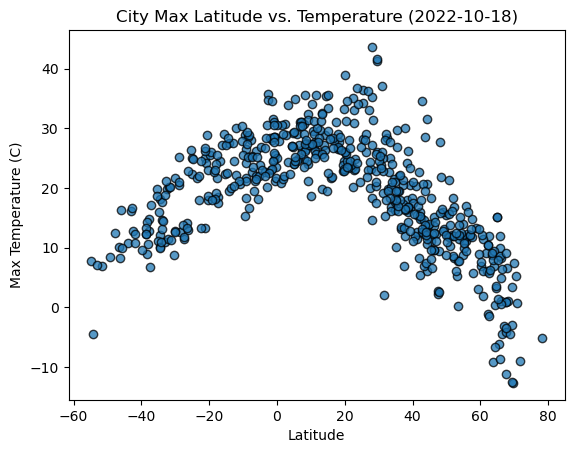

In [52]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df2["Lat"], city_data_df["Max Temp"], edgecolors = "black", alpha = .75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

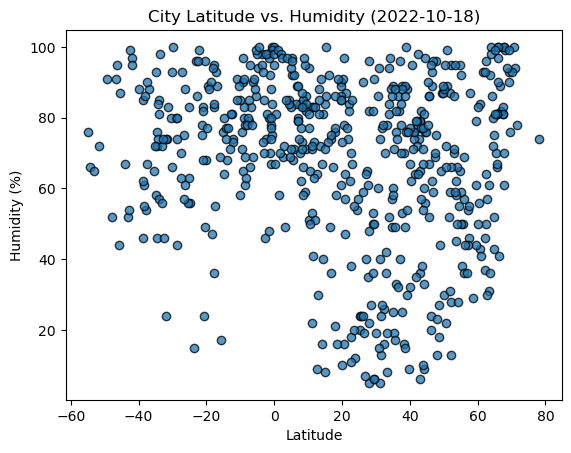

In [53]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df2["Lat"], city_data_df["Humidity"], edgecolors = "black", alpha = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

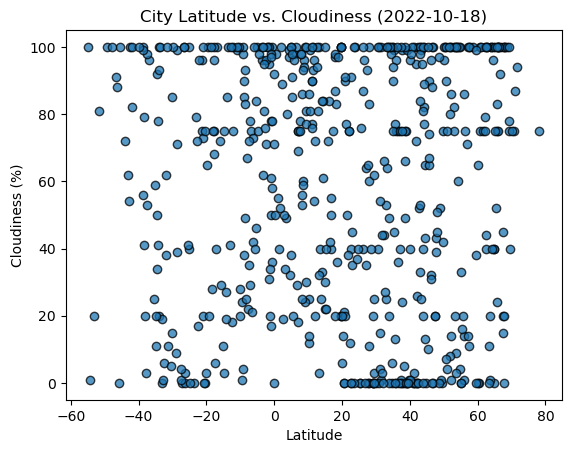

In [54]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df2["Lat"], city_data_df["Cloudiness"], edgecolors = "black", alpha = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

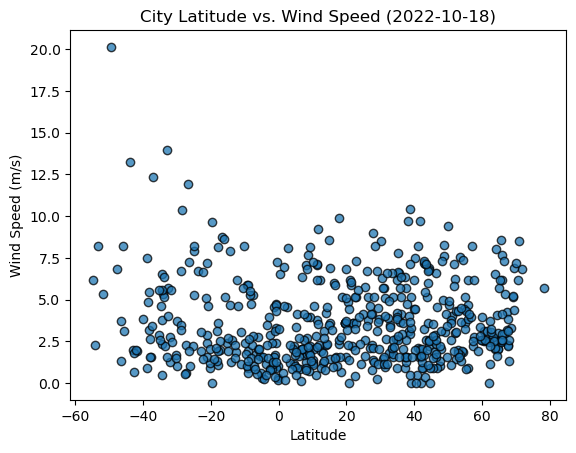

In [55]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df2["Lat"], city_data_df["Wind Speed"], edgecolors = "black", alpha = .75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [56]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df2.loc[(city_data_df2["Lat"] > 0), :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,0.83,100,100,2.28,RU,10800
1,tazovsky,67.4667,78.7000,-11.14,81,45,4.23,RU,18000
2,laguna,38.4210,-121.4238,17.99,70,0,3.09,US,-25200
7,hilo,19.7297,-155.0900,24.60,90,100,3.60,US,-36000
9,tamanrasset,22.7850,5.5228,22.95,18,0,5.14,DZ,3600


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df2.loc[(city_data_df2["Lat"] < 0), :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,6.86,72,81,5.36,CL,-10800
4,puerto ayora,-0.7393,-90.3518,24.75,100,36,3.27,EC,-21600
5,santa cruz,-17.8000,-63.1667,21.70,83,75,3.60,BO,-14400
6,avarua,-21.2078,-159.7750,25.03,78,75,7.20,CK,-36000
8,villa berthet,-27.2917,-60.4126,11.52,93,0,2.25,AR,-10800


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.82395273249801


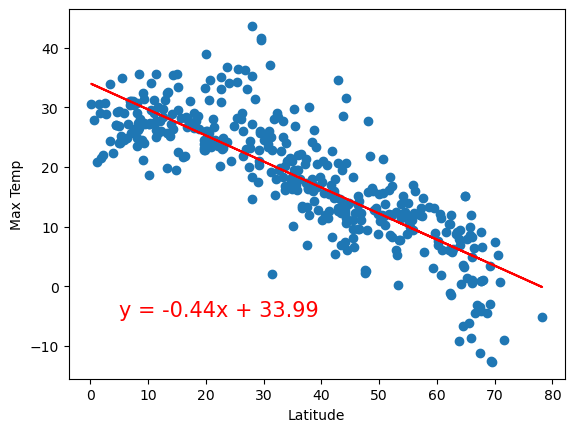

In [67]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.7911493894624242


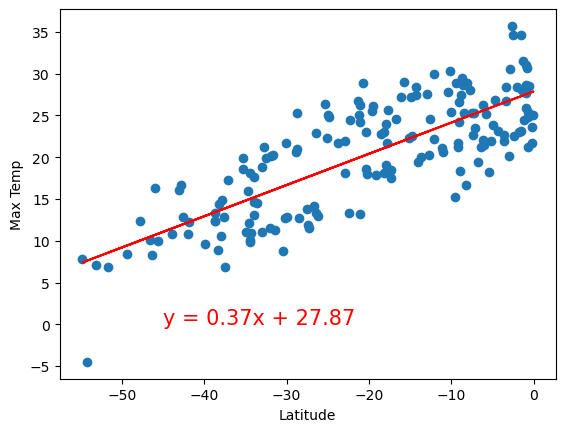

In [68]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
As Latitude approaches 0, the max temp increases. As latitude moves away from 0, we can expect a lower max temp.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0005389722038028275


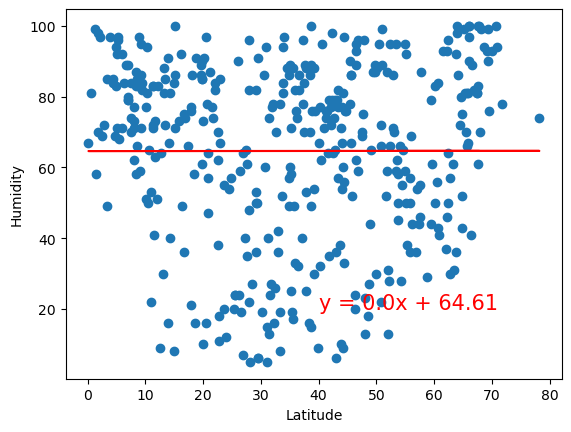

In [69]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.23411855694563138


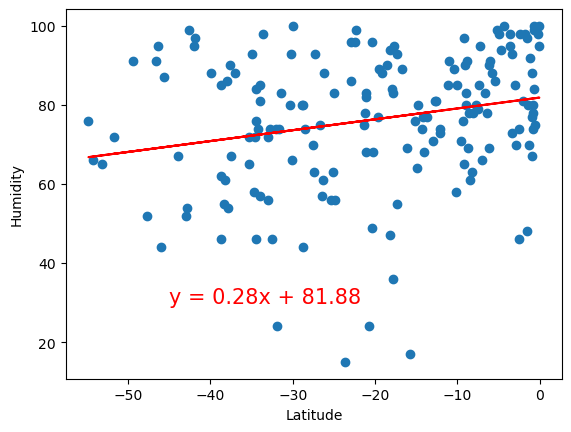

In [70]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Humidity tends to stay around the same value (from 60 to 100) no matter what the Latitude is. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.005115343294352593


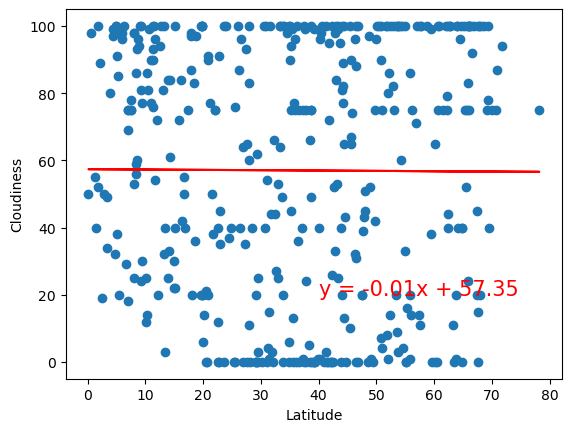

In [71]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.08073728585263074


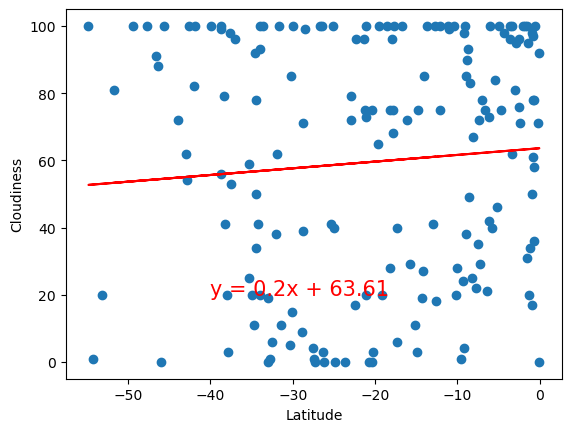

In [72]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There does not seem to be any correlation between the latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10707566023718694


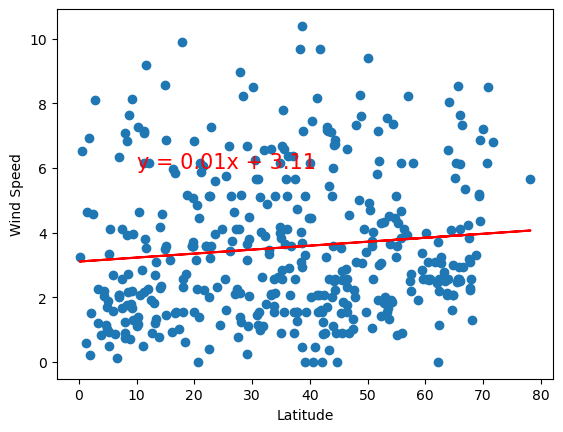

In [73]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,6),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.3351796634231287


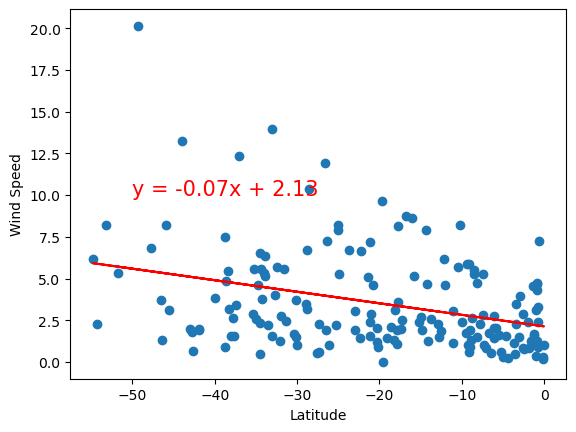

In [66]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Wind Speed tends to stay around the same value (from 0 to 10) no matter what the Latitude is. 